# Dados Fornecidos

In [48]:
import pandas as pd
import numpy as geek
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
filename_features = "../Dados/UCI HAR Dataset/features.txt"
filename_labels = "../Dados/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "../Dados/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "../Dados/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "../Dados/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "../Dados/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "../Dados/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "../Dados/UCI HAR Dataset/test/y_test.txt"

In [3]:
# Remove squeeze=True
subject_train = pd.read_csv('/content/subject_train.txt', header=None, names=['subject_id'])

In [4]:
# Você pode usar o squeeze depois de ler o csv
subject_train = subject_train.squeeze()
X_train = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('/content/y_train.txt', header=None, names=['cod_label'])
subject_test = pd.read_csv('/content/subject_train.txt', header=None, names=['subject_id'])

<ipython-input-4-95993348d561>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None)


In [5]:
# Você pode usar o squeeze depois de ler o csv
subject_test = subject_test.squeeze()
X_test = pd.read_csv('/content/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('/content/y_test.txt', header=None, names=['cod_label'])

<ipython-input-5-1a27cafe0305>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('/content/X_test.txt', delim_whitespace=True, header=None)


# Códigos

In [15]:
df = pd.read_csv('/content/subject_train.txt', delim_whitespace=True, header=None)
df1 = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None)

<ipython-input-15-1e067f0f860e>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/content/subject_train.txt', delim_whitespace=True, header=None)
<ipython-input-15-1e067f0f860e>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df1 = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None)


In [16]:
df.head()

,0
0,1
1,1
2,1
3,1
4,1


In [17]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [18]:
# Separar as características
X = df.values

In [19]:
%%time

# PCA sem padronização
pca_no_scaling = PCA()
pca_no_scaling.fit(X)

CPU times: user 3.55 ms, sys: 0 ns, total: 3.55 ms
Wall time: 15.6 ms


PCA()

In [20]:
%%time

# PCA com padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_with_scaling = PCA()
pca_with_scaling.fit(X_scaled)

CPU times: user 4.45 ms, sys: 0 ns, total: 4.45 ms
Wall time: 5.12 ms


PCA()

In [21]:
# Variância explicada
explained_variance_no_scaling = pca_no_scaling.explained_variance_ratio_
explained_variance_with_scaling = pca_with_scaling.explained_variance_ratio_

In [24]:
# Variância acumulada
cumulative_variance_no_scaling = np.cumsum(explained_variance_no_scaling)
cumulative_variance_with_scaling = np.cumsum(explained_variance_with_scaling)

In [25]:
# Variância percentual
percent_variance_no_scaling = explained_variance_no_scaling * 100
percent_variance_with_scaling = explained_variance_with_scaling * 100

In [26]:
# Variância percentual acumulada
percent_cumulative_variance_no_scaling = cumulative_variance_no_scaling * 100
percent_cumulative_variance_with_scaling = cumulative_variance_with_scaling * 100

In [27]:
# Quantidade de componentes para explicar 90% da variância
components_90_no_scaling = np.argmax(cumulative_variance_no_scaling >= 0.90) + 1
components_90_with_scaling = np.argmax(cumulative_variance_with_scaling >= 0.90) + 1

In [28]:
# Resultados
print("PCA sem padronização:")
print("Variância explicada por componente:", percent_variance_no_scaling)
print("Variância acumulada por componente:", percent_cumulative_variance_no_scaling)
print("Componentes para 90% da variância:", components_90_no_scaling)

print("\nPCA com padronização:")
print("Variância explicada por componente:", percent_variance_with_scaling)
print("Variância acumulada por componente:", percent_cumulative_variance_with_scaling)
print("Componentes para 90% da variância:", components_90_with_scaling)

PCA sem padronização:
Variância explicada por componente: [100.]
Variância acumulada por componente: [100.]
Componentes para 90% da variância: 1

PCA com padronização:
Variância explicada por componente: [100.]
Variância acumulada por componente: [100.]
Componentes para 90% da variância: 1


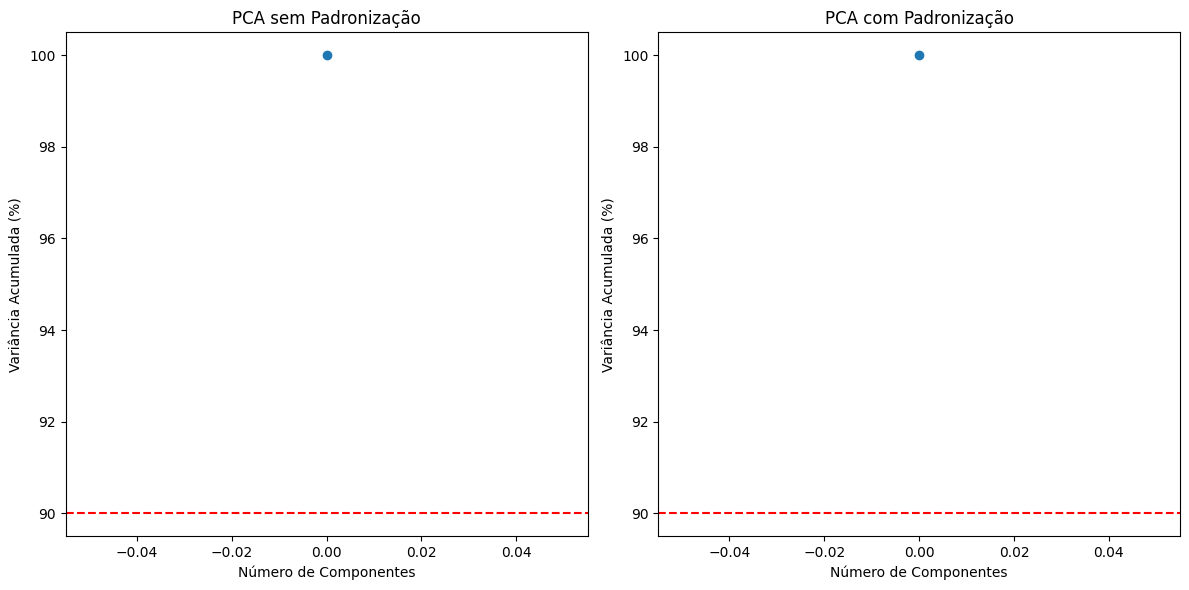

In [29]:
# Gráfico da variância explicada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(percent_cumulative_variance_no_scaling, marker='o')
plt.title('PCA sem Padronização')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada (%)')
plt.axhline(y=90, color='r', linestyle='--')

plt.subplot(1, 2, 2)
plt.plot(percent_cumulative_variance_with_scaling, marker='o')
plt.title('PCA com Padronização')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada (%)')
plt.axhline(y=90, color='r', linestyle='--')

plt.tight_layout()
plt.show()

**✈**

In [30]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [31]:
# Separar características e rótulos
X = df1.drop(columns=df.columns[0], axis=1).values
y = df1[df.columns[0]].values

In [32]:
# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Verificar as dimensões dos conjuntos de treino e teste
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5881, 560)
Shape of y_train: (5881,)
Shape of X_test: (1471, 560)
Shape of y_test: (1471,)


In [34]:
# PCA sem padronização
pca_no_scaling = PCA(n_components=10)
X_train_pca_no_scaling = pca_no_scaling.fit_transform(X_train)
X_test_pca_no_scaling = pca_no_scaling.transform(X_test)

In [37]:
# Treinando a árvore de decisão sem padronização
tree_no_scaling = DecisionTreeRegressor(ccp_alpha=0.001)
tree_no_scaling.fit(X_train_pca_no_scaling, y_train)

DecisionTreeRegressor(ccp_alpha=0.001)

In [38]:
# Previsões e acurácia sem padronização
y_train_pred_no_scaling = tree_no_scaling.predict(X_train_pca_no_scaling)
y_test_pred_no_scaling = tree_no_scaling.predict(X_test_pca_no_scaling)

In [41]:
# Calculate Mean Squared Error (MSE)
mse_train_no_scaling = mean_squared_error(y_train, y_train_pred_no_scaling)
mse_test_no_scaling = mean_squared_error(y_test, y_test_pred_no_scaling)

In [42]:
# Print the MSE values
print(f"Trem MSE sem escalonamento: {mse_train_no_scaling}")
print(f"Trem MSE sem escalonamento: {mse_test_no_scaling}")

Trem MSE sem escalonamento: 0.004930109054269721
Trem MSE sem escalonamento: 0.004959539484970251


In [43]:
# PCA com padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca_with_scaling = PCA(n_components=10)
X_train_pca_with_scaling = pca_with_scaling.fit_transform(X_train_scaled)
X_test_pca_with_scaling = pca_with_scaling.transform(X_test_scaled)

In [46]:
# Treinando a árvore de decisão com padronização
tree_with_scaling = DecisionTreeRegressor(ccp_alpha=0.001)
tree_with_scaling.fit(X_train_pca_with_scaling, y_train)

DecisionTreeRegressor(ccp_alpha=0.001)

In [52]:
# Previsões e acurácia com padronização
y_train_pred_with_scaling = tree_with_scaling.predict(X_train_pca_with_scaling)
y_test_pred_with_scaling = tree_with_scaling.predict(X_test_pca_with_scaling)

# Calculate Mean Squared Error (MSE)
mse_train_with_scaling = mean_squared_error(y_train, y_train_pred_with_scaling)
mse_test_with_scaling = mean_squared_error(y_test, y_test_pred_with_scaling)

# Calculate R-squared (R2)
r2_train_with_scaling = r2_score(y_train, y_train_pred_with_scaling)
r2_test_with_scaling = r2_score(y_test, y_test_pred_with_scaling)

# Print the evaluation metrics
print(f"Treine MSE com escalonamento: {mse_train_with_scaling}")
print(f"Teste MSE com escalonamento: {mse_test_with_scaling}")
print(f"Treine R2 com escalonamento: {r2_train_with_scaling}")
print(f"Teste R2 com escalonamento: {r2_test_with_scaling}")

Treine MSE com escalonamento: 0.004930109054269721
Teste MSE com escalonamento: 0.004959539484970251
Treine R2 com escalonamento: -2.220446049250313e-16
Teste R2 com escalonamento: -7.125005037145193e-05
